# Running Model

Calibrated params from calibration_us_gdp.ipynb

/Users/ebbamark/Documents/Documents - Nuff-Malham/GitHub/transition_abm/calibration_remote/collate_macro_vars.py:211: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['OBS_VALUE'] = hp_filter.hpfilter(subset['OBS_VALUE'], lamb=1600)[0]*.01+1


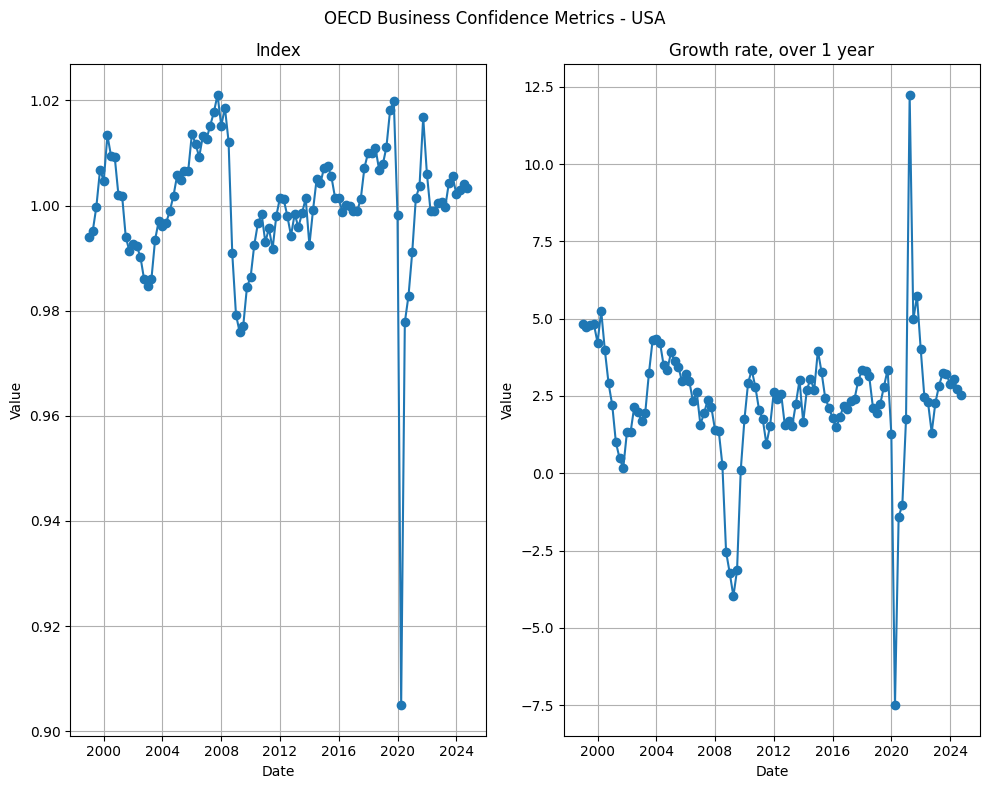

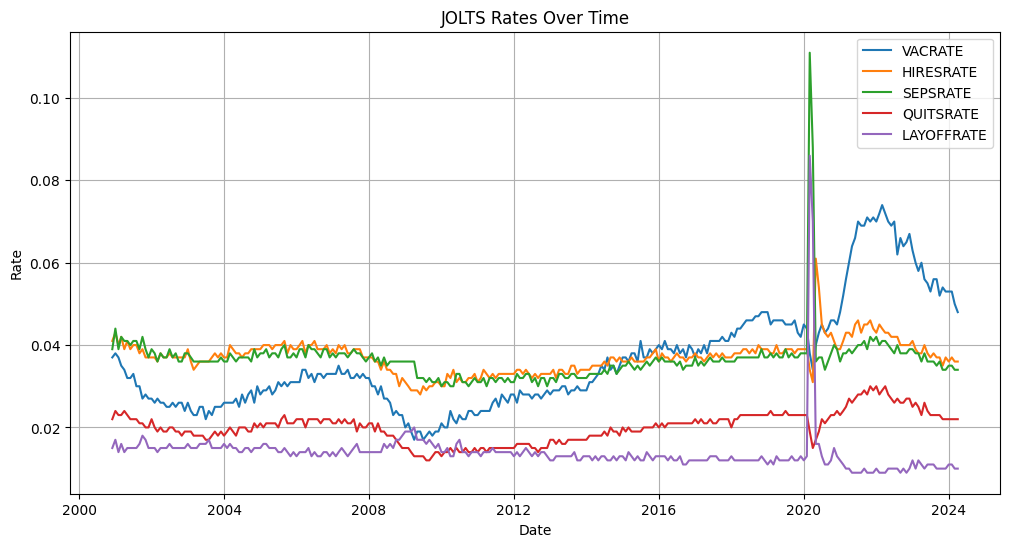

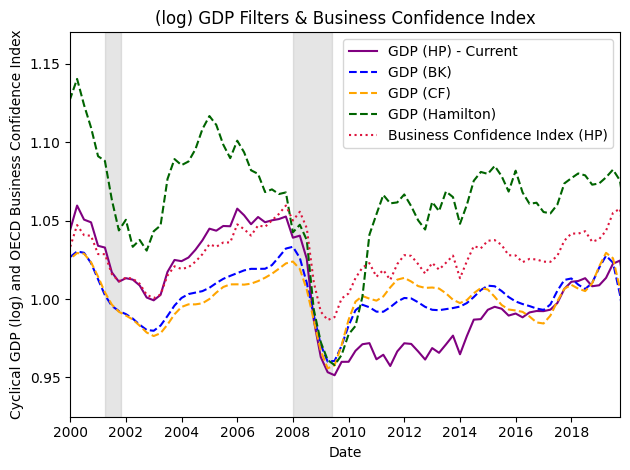

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_ol

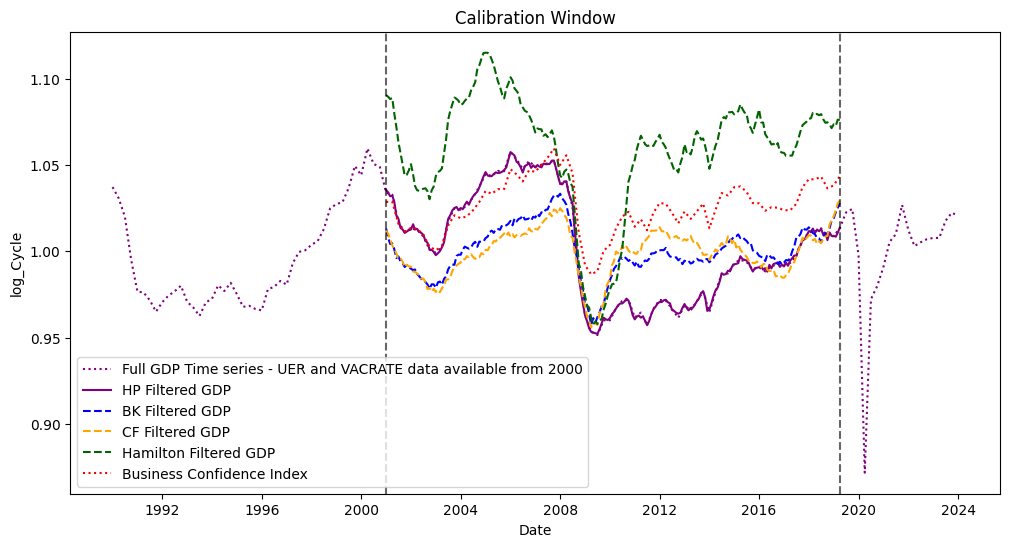

NEW Function import successful
8


In [1]:
# Import packages
from abm_funs import *
from plot_funs import*
# from us_input import *
import numpy as np
from copy import deepcopy 
import pandas as pd
import random as random
import matplotlib.pyplot as plt
from model_fun import *
from scipy.stats import pearsonr, linregress
import math as math
import importlib
from copy import deepcopy
from pandas import Series
import os
import seaborn as sns
import datetime

from collate_macro_vars import *
from statsmodels.tsa.filters import hp_filter, bk_filter, cf_filter
from quantecon import hamilton_filter
from statsmodels.tsa.seasonal import seasonal_decompose
import csv

rng = np.random.default_rng()
test_fun()

path = "~/Documents/Documents - Nuff-Malham/GitHub/transition_abm/calibration_remote/"

import os
print(os.cpu_count()) 

save_button = True

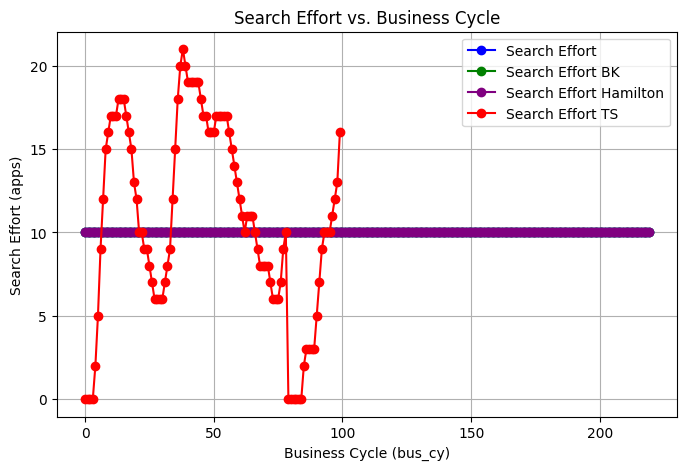

In [2]:
# Search Effort Time Series
search_effort_dat = pd.read_csv("data/quarterly_search_ts.csv")
search_effort_dat['DATE'] = pd.to_datetime(search_effort_dat['year'].astype(str) + '-' + (search_effort_dat['quarter'] * 3 - 2).astype(str) + '-01')
search_effort_np = np.array(search_effort_dat['value_smooth'])
search_effort_np = search_effort_np/search_effort_np.mean()
#realgdp[(realgdp['DATE'] >= calib_date[0]) & (realgdp['DATE'] <= calib_date[1])]

# Define a range of bus_cy values  # Generates 100 values from 0 to 1
search_effort_values = [search_effort_alpha(0, b, False, 0.1) for b in gdp_dat]  # Apply function
search_effort_bk_values = [search_effort_alpha(0, b, False, 0.1) for b in gdp_dat_bk]  # Apply function
search_effort_hamilton_values = [search_effort_alpha(0, b, False, 0.1) for b in gdp_dat_hamilton]  # Apply function
# def search_effort_ts(t_unemp, se):
#     apps = max(0, round(10 - 100*(1-se)))
#     # if discouraged:
#     #     apps = round(a_stable/((t_unemp)**2 + 1)) + 1
#     return apps
search_effort_values_dyn = [search_effort_ts(0, b) for b in search_effort_np]

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(range(len(search_effort_values)), search_effort_values, marker='o', linestyle='-', color='b', label="Search Effort")
plt.plot(range(len(search_effort_bk_values)), search_effort_bk_values, marker='o', linestyle='-', color='g', label="Search Effort BK")
plt.plot(range(len(search_effort_hamilton_values)), search_effort_hamilton_values, marker='o', linestyle='-', color='purple', label="Search Effort Hamilton")

plt.plot(range(len(search_effort_values_dyn)), search_effort_values_dyn, marker='o', linestyle='-', color='r', label="Search Effort TS")
plt.xlabel("Business Cycle (bus_cy)")
plt.ylabel("Search Effort (apps)")
plt.title("Search Effort vs. Business Cycle")
plt.legend()
plt.grid(True)
plt.show()

We draw the probability distribution of sending a particular binned value of applications from our work on the BLS Suppelement. We assume a uniform distribution within each bin setting a maximum application effort in the highest bin to 100 applications. 

{'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35], 'y': [10, 10, 12, 14, 16, 18, 20, 22, 19, 16, 11, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
{'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35], 'y': [10, 10, 11, 12, 13, 14, 15, 16, 15, 14, 13, 12, 10, 9, 7, 5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
{'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35], 'y': [10, 10, 10, 11, 12, 12, 12, 13, 13, 13, 12, 12, 12, 11, 10, 10, 10, 9, 8, 8, 7, 6, 5, 4, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
{'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35], 'y': [10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 

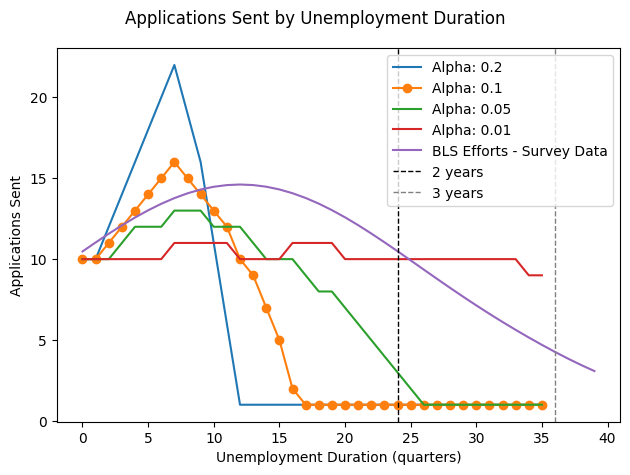

{'Alpha: 0.2': {'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35], 'y': [10, 10, 12, 14, 16, 18, 20, 22, 19, 16, 11, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}, 'Alpha: 0.1': {'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35], 'y': [10, 10, 11, 12, 13, 14, 15, 16, 15, 14, 13, 12, 10, 9, 7, 5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}, 'Alpha: 0.05': {'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35], 'y': [10, 10, 10, 11, 12, 12, 12, 13, 13, 13, 12, 12, 12, 11, 10, 10, 10, 9, 8, 8, 7, 6, 5, 4, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}, 'Alpha: 0.01': {'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 3

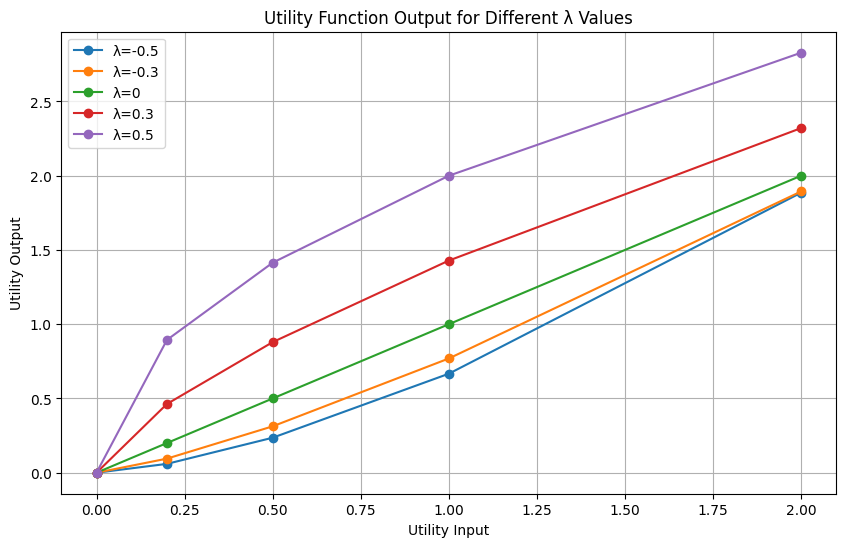

In [20]:
from scipy.stats import truncnorm

series_dict = {}
for i, a in enumerate([0.2, 0.1, 0.05, 0.01]):
    efforts = []
    for t_unemp in range(36):
        apps = search_effort_alpha(t_unemp, 1, True, a)
        efforts.append(apps)

    series_dict[f"Alpha: {a}"] = {
        "x": list(range(0, len(efforts))),
        "y": efforts
        }

imposed_efforts = []
for t_unemp in range(40):
    apps = applications_sent(duration_months=t_unemp, duration_to_prob_dict=duration_to_prob_dict, expectation = True)
    imposed_efforts.append(apps)
series_dict['BLS Efforts - Survey Data'] = {
    "x": list(range(0, len(imposed_efforts))),
    "y": imposed_efforts
    }

for i, a in series_dict.items():
    print(a)
    if i == 'Alpha: 0.1':
        plt.plot(a['x'], a['y'],marker='o', linestyle='-', label=i)
    else:
        plt.plot(a['x'], a['y'],  linestyle='-', label=i)
    plt.xlabel("Unemployment Duration (quarters)")
    plt.ylabel("Applications Sent")

   
plt.axvline(x=24, color='black', linestyle='--', linewidth=1, label='2 years')
plt.axvline(x=36, color='grey', linestyle='--', linewidth=1, label='3 years')
plt.legend(loc='upper right')
plt.suptitle("Applications Sent by Unemployment Duration")
plt.tight_layout()
plt.savefig('output/figures/applications_sent_by_unemployment_duration.png', dpi=300)
plt.show()

print(series_dict)
def utility_fun(lambda_param, utility):
    if lambda_param == 1:
        return(np.log(utility))
    else:
        return((utility**(1-lambda_param))/(1-lambda_param))

lambdas = [-0.5, -0.3, 0, 0.3, 0.5]
utilities = [0, 0.2, 0.5, 1, 2]

plt.figure(figsize=(10, 6))

for lambda_p in lambdas:
    utility_outputs = []
    for utility in utilities:
        utility_outputs.append(utility_fun(lambda_p, utility))
    plt.plot(utilities, utility_outputs, marker='o', label=f'λ={lambda_p}')

plt.xlabel('Utility Input')
plt.ylabel('Utility Output') 
plt.title('Utility Function Output for Different λ Values')
plt.grid(True)
plt.legend()
plt.show()



### Unemployed Search Effort Time Series

smoothing vac_df
220


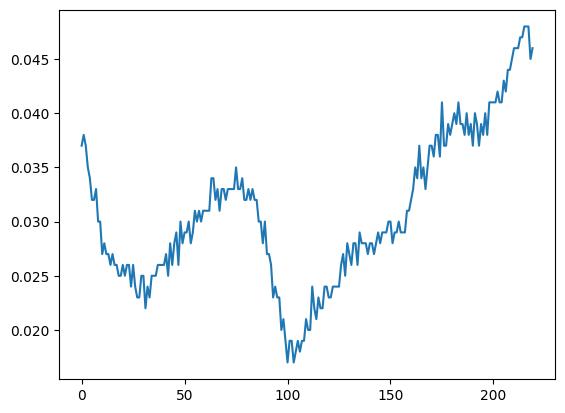

In [4]:


# Macro observations
observation = macro_observations.loc[(macro_observations['DATE'] >= calib_date[0]) & (macro_observations['DATE'] <= calib_date[1])].dropna(subset=["UNRATE", "VACRATE"]).reset_index()
# Load US_input data
A = pd.read_csv(path+"dRC_Replication/data/occupational_mobility_network.csv", header=None)
employment = round(pd.read_csv(path+"dRC_Replication/data/ipums_employment_2016.csv", header = 0).iloc[:, [4]]/10000)
# Crude approximation using avg unemployment rate of ~5% - should aim for occupation-specific unemployment rates
unemployment = round(employment*(0.05/0.95))
# Less crude approximation using avg vacancy rate - should still aim for occupation-specific vacancy rates
vac_rate_base = pd.read_csv(path+"dRC_Replication/data/vacancy_rateDec2000.csv").iloc[:, 2].mean()/100
vacancies = round(employment*vac_rate_base/(1-vac_rate_base))
# Needs input data...
demand_target = employment + vacancies
wages = pd.read_csv(path+"dRC_Replication/data/ipums_variables.csv")[['median_earnings']]
occ_ids = pd.read_csv(path+"dRC_Replication/data/ipums_variables.csv")[['id', 'acs_occ_code']]
gend_share = pd.read_csv(path+"data/ipums_variables_w_gender.csv")[['women_pct']]
mod_data =  {"A": A, "employment": employment, 
             'unemployment':unemployment, 'vacancies':vacancies, 
             'demand_target': demand_target, 'wages': wages, 'gend_share': gend_share}

###################################
# Initialise the model
##################################
net_temp, vacs = initialise(len(mod_data['A']), mod_data['employment'].to_numpy(), mod_data['unemployment'].to_numpy(), mod_data['vacancies'].to_numpy(), mod_data['demand_target'].to_numpy(), mod_data['A'], mod_data['wages'].to_numpy(), mod_data['gend_share'].to_numpy(), 0, 0)

# observation = macro_observations.loc[(macro_observations['DATE'] >= calib_date[0]) & (macro_observations['DATE'] <= calib_date[1])].dropna(subset = ["UNRATE", "VACRATE"]).reset_index()
# Load calibrated parameters from CSV
param_df = pd.read_csv(path+"output/calibrated_params_all.csv")
# Sort by Timestamp in descending order
param_df = param_df.sort_values(by='Timestamp', ascending=False)

params = {'mod_data': mod_data, 
            'net_temp': net_temp,
            'vacs': vacs, 
            'time_steps': len(gdp_dat),
            'delay': 100,
            'gdp_data': gdp_dat,
            'app_effort_dat': duration_to_prob_dict}

# Shorten vac_df to the same length as gdp_dat using a moving average (if needed)   
vac_df = observation['VACRATE'].to_numpy()
if len(vac_df) > len(gdp_dat):
    print("smoothing vac_df")
    # Apply moving average with window to smooth and match length
    window = len(vac_df) // len(gdp_dat)
    vac_dat = Series(vac_df).rolling(window=window, min_periods=1).mean()[window-1::window].reset_index(drop=True)
    vac_dat = vac_dat[:len(gdp_dat)]
else:
    vac_dat = vac_df[:len(gdp_dat)]
    
print(len(vac_dat))
plt.plot(vac_dat, label="Vacancy Rate (smoothed)")


In [5]:
# run_single_local(
#     d_u = 0.01, 
#     #d_v = 0.1,
#     gamma_u = 0.01,
#     #gamma_v = 0.1,
#     otj = True,
#     cyc_otj = True, 
#     cyc_ue = True, 
#     disc = True,
#     mod_data = mod_data, 
#     net_temp = net_temp, 
#     vacs = vacs, 
#     time_steps = len(gdp_dat), # set equal to length of gdp_data
#     delay = 100,
#     gdp_data = gdp_dat,
#     bus_confidence_dat = gdp_dat,
#     app_effort_dat = duration_to_prob_dict,
#     simple_res = False, 
#     vac_data = vac_dat
# )

In [6]:
calib_list = {
    "nonbehav": {"otj": False, # has been run
                           "cyc_otj": False, 
                           "cyc_ue": False, 
                           "disc": False,
                           "delay": 100,
                           "bus_confidence_dat": gdp_dat,
                           'vac_data': vac_dat},
              "otj_nonbehav": {"otj": True, # has been run
                           "cyc_otj": False, 
                           "cyc_ue": False, 
                           "disc": False, 
                           "delay": 100,
                           "bus_confidence_dat": gdp_dat,
                            "vac_data": vac_dat},
            #   "otj_cyclical_e": {"otj": True,
            #                "cyc_otj": True, 
            #                "cyc_ue": False, 
            #                "disc": False,
            #                "bus_confidence_dat": gdp_dat},
            #   "otj_cyclical_ue": {"otj": True,
            #                "cyc_otj": False, 
            #                "cyc_ue": True, 
            #                "disc": False,
            #                "bus_confidence_dat": gdp_dat},
            #   "otj_cyclical_e_ue": {"otj": True,
            #                "cyc_otj": True, 
            #                "cyc_ue": True, 
            #                "disc": False,
            #                "bus_confidence_dat": gdp_dat},
              "otj_cyclical_e_disc": {"otj": True,
                           "cyc_otj": True, 
                           "cyc_ue": False, 
                           "disc": True,
                           "delay": 100,
                           "bus_confidence_dat": gdp_dat,
                           "vac_data": vac_dat},
            #   "otj_cyclical_ue_disc": {"otj": True,
            #                "cyc_otj": False, 
            #                "cyc_ue": True, 
            #                "disc": True,
            #                "bus_confidence_dat": gdp_dat},
              # "otj_cyclical_e_ue_disc": {"otj": True,
              #              "cyc_otj": True, 
              #              "cyc_ue": True, 
              #              "disc": True,
              #              "bus_confidence_dat": gdp_dat},
            "otj_disc": {"otj": True,
                          "cyc_otj": False, 
                          "cyc_ue": False, 
                          "disc": True,
                            "delay": 100,
                          "bus_confidence_dat": gdp_dat,
                          "vac_data": vac_dat}
            }

In [7]:
# Initialize the results dictionaries
model_results = {}
net_results = {}
sim_results = {}
sum_stats_list = {}
seekers_recs = {}

print(param_df)
# Loop through each model configuration
for name, item in calib_list.items():
    print(name)
    # Create a deep copy of the base parameters
    test_params = deepcopy(params)

    # Update with values from param_df specific to the current model name
    if name in param_df['model_cat'].values:
        param_updates = param_df[param_df['model_cat'] == name].set_index('Parameter')['Value'].to_dict()
        print(param_updates)
        test_params.update(param_updates)

    # Update with the values from the calib_list
    test_params.update(item)
    
    # Run the model
    sim_record, sim_grouped, sim_net, sum_stats, seekers_rec = run_single_local(**test_params)

    # Generate plots or metrics (optional step)
    #ue_vac = plot_records(sim_record, calib_date[0], calib_date[1])
    sim_grouped['DATE'] = pd.date_range(start=calib_date[0], end= calib_date[1], periods=len(sim_grouped))
    sim_grouped['LTUE Rate'] = sim_grouped['LT Unemployed Persons'] / sim_grouped['Unemployment']
    sim_grouped['AVGWAGE'] = sim_grouped['Total_Wages'] / sim_grouped['Employment']
    sim_record['LTUE Rate'] = sim_record['LT Unemployed Persons'] / sim_record['Unemployment']
    sim_record['UER'] = sim_record['Unemployment'] / sim_record['Workers']
    sim_record['AVGWAGE'] = sim_record['Total_Wages'] / sim_record['Employment']
    sim_record['VACRATE1'] = sim_record['Vacancies'] / sim_record['Target_Demand']
    sim_record['VACRATE'] = sim_record['Vacancies'] / (sim_record['Vacancies'] + sim_record['Employment'])
    sim_record['U_REL_WAGE_MEAN'] = sim_record['U_Rel_Wage'] / sim_record['UE_Transitions']
    sim_record['E_REL_WAGE_MEAN'] = sim_record['E_Rel_Wage'] / sim_record['EE_Transitions']
    sim_record['UE_Trans_Rate'] = sim_record['UE_Transitions'] / sim_record['Workers']
    sim_record['EE_Trans_Rate'] = sim_record['EE_Transitions'] / sim_record['Workers']
    sim_record = sim_record.merge(occ_ids, left_on='Occupation', right_on="id", how='left')

    seekers_rec['DATE'] = pd.date_range(start=calib_date[0], end= calib_date[1], periods=len(seekers_rec))

    # Store the results
    model_results[name] = sim_grouped
    sim_results[name] = sim_record
    net_results[name] = sim_net
    sum_stats_list[name] = sum_stats
    seekers_recs[name] = seekers_rec

   Parameter     Value    otj  cyc_otj  cyc_ue   disc            Timestamp  \
10       d_u  0.001965   True    False   False   True  2025-06-26 02:39:00   
11   gamma_u  0.005895   True    False   False   True  2025-06-26 02:39:00   
8        d_u  0.002340   True     True   False   True  2025-06-26 01:50:24   
9    gamma_u  0.005114   True     True   False   True  2025-06-26 01:50:24   
6        d_u  0.000352   True    False   False  False  2025-06-26 00:59:51   
7    gamma_u  0.617953   True    False   False  False  2025-06-26 00:59:51   
4        d_u  0.007198  False    False   False  False  2025-06-26 00:04:50   
5    gamma_u  0.647185  False    False   False  False  2025-06-26 00:04:50   
2        d_u  0.006155   True    False   False   True  2025-06-25 17:37:29   
3    gamma_u  0.020735   True    False   False   True  2025-06-25 17:37:29   
0        d_u  0.007504   True     True   False   True  2025-06-25 17:17:15   
1    gamma_u  0.018580   True     True   False   True  2025-06-2

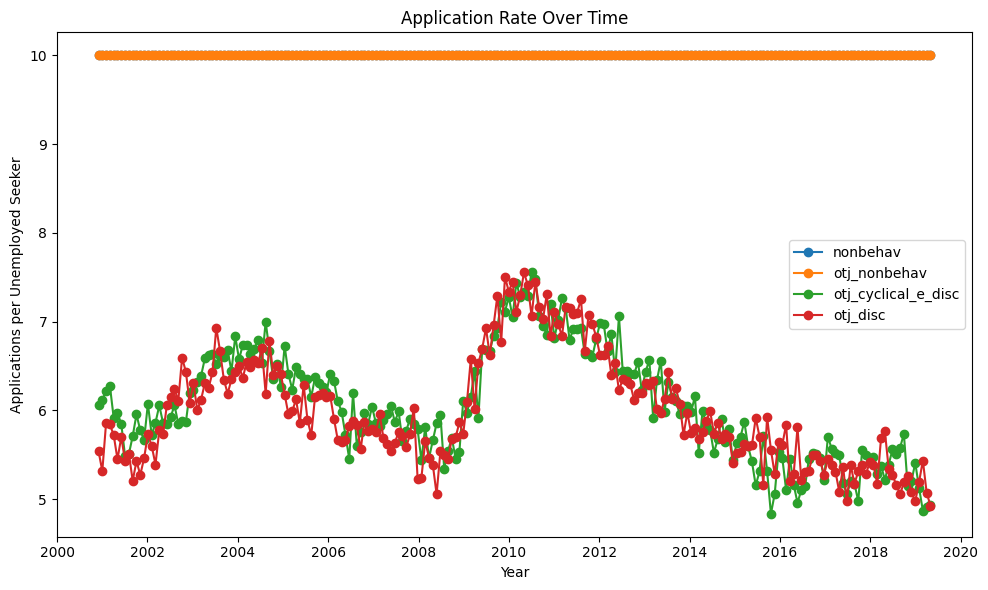

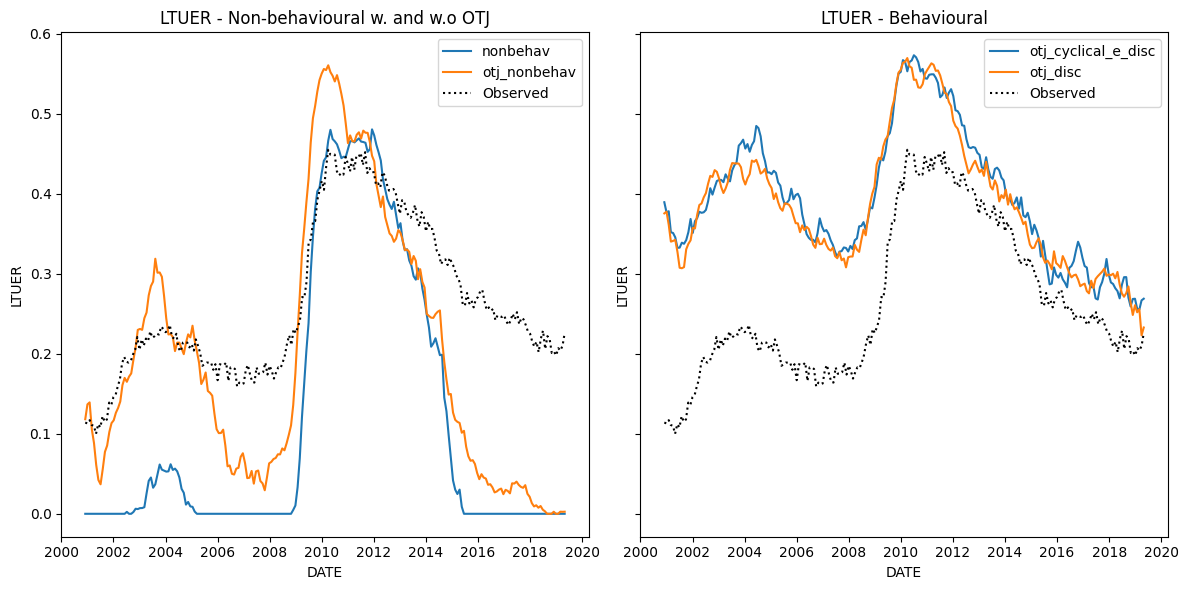

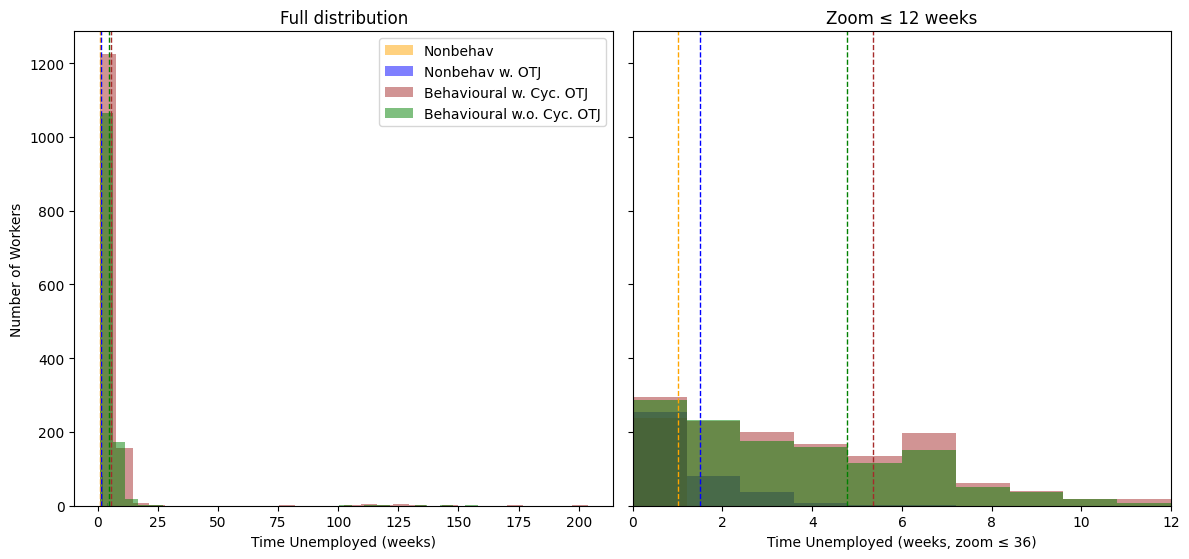

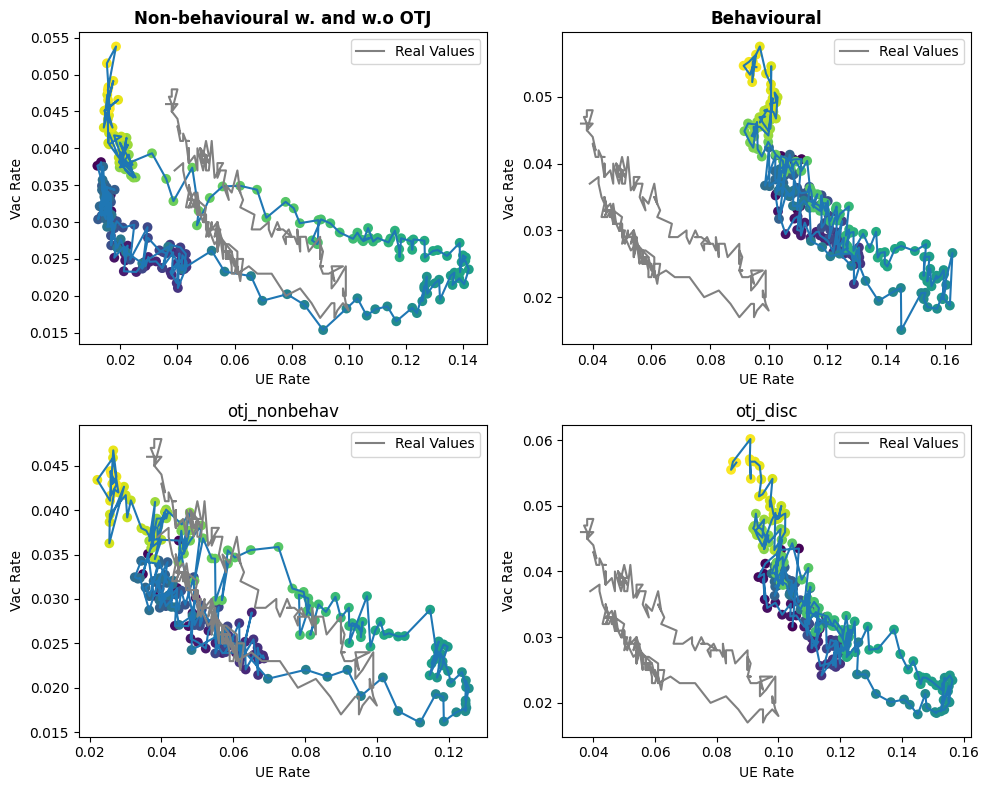

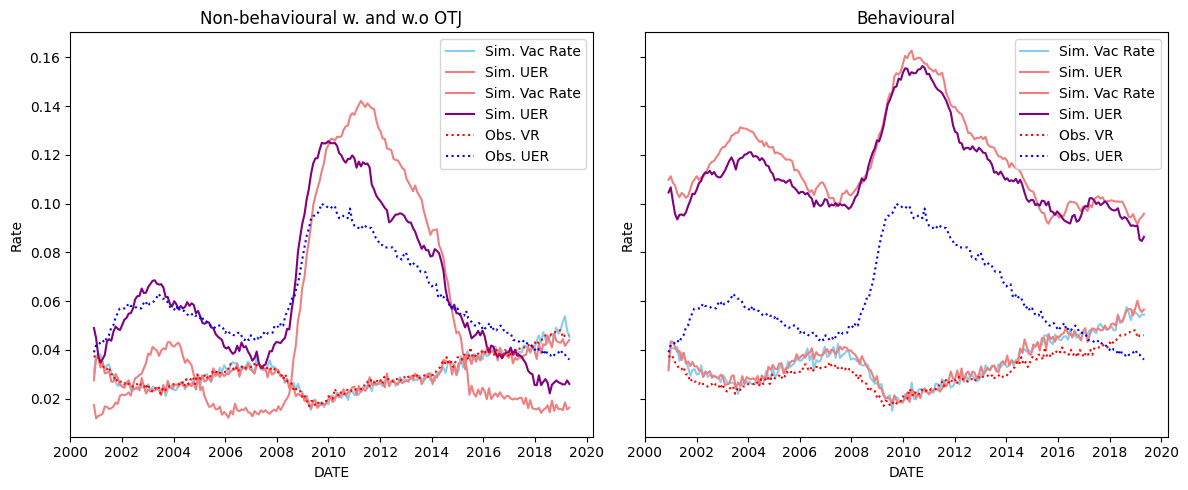

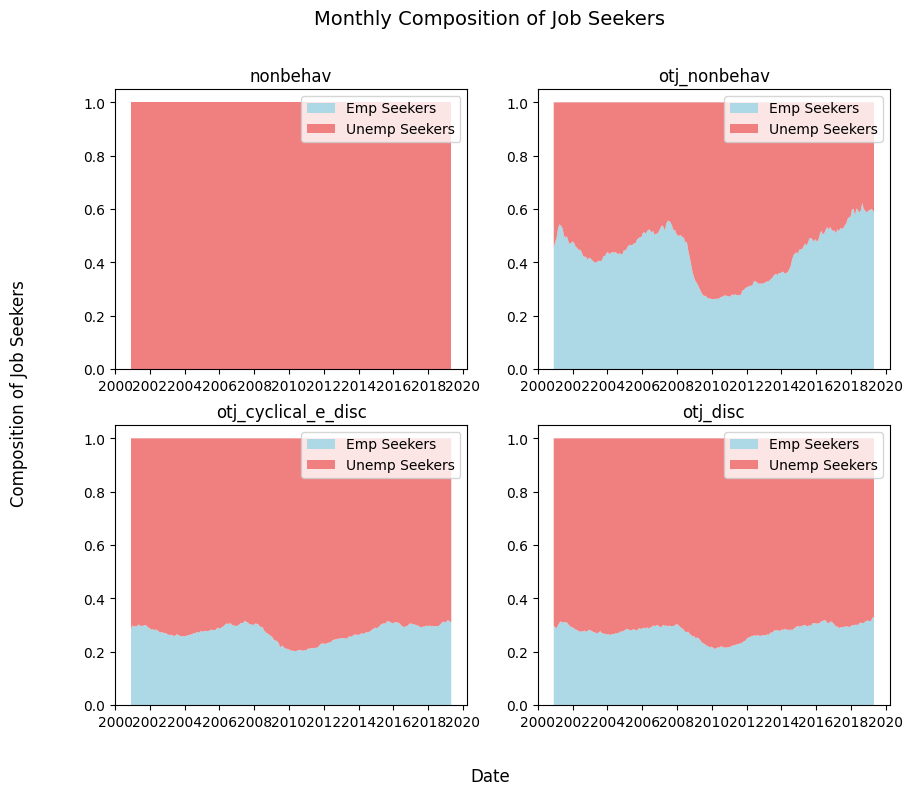

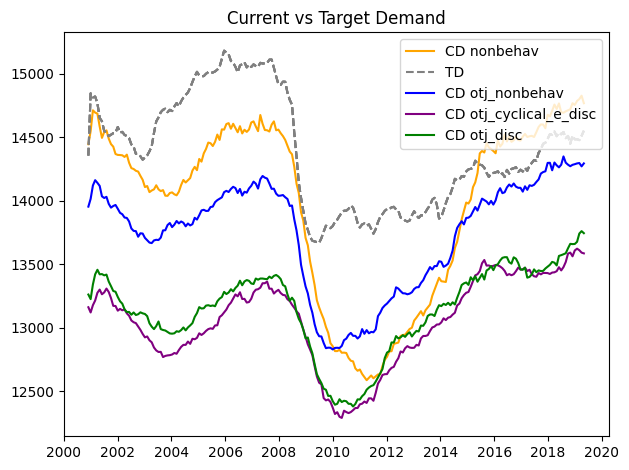

In [19]:
output_path = "output/figures/"
filtered_model_results = {key: model_results[key] for key in ["nonbehav","otj_nonbehav", "otj_cyclical_e_disc", 'otj_disc'] if key in model_results}
filtered_net_results = {key: net_results[key] for key in ["nonbehav","otj_nonbehav", "otj_cyclical_e_disc", 'otj_disc'] if key in net_results}
filtered_sim_results = {key: sim_results[key] for key in ["nonbehav","otj_nonbehav", "otj_cyclical_e_disc", 'otj_disc'] if key in sim_results}
filtered_sum_stats = {key: sum_stats_list[key] for key in ["nonbehav","otj_nonbehav", "otj_cyclical_e_disc", 'otj_disc'] if key in sum_stats_list}

plt.figure(figsize=(10, 6))
for i, (name, item) in enumerate(seekers_recs.items()):
    plt.plot(item['DATE'], item['Applications Sent'] / item['Unemployed Seekers'], marker='o', label=name)
plt.xlabel('Year')
plt.ylabel('Applications per Unemployed Seeker')
plt.title('Application Rate Over Time')
plt.tight_layout()
plt.legend()
plt.savefig(f'{output_path}applications_per_unemployed_seeker.png')
plt.show()

plot_ltuer(filtered_model_results, observation, sep_strings = [("nonbehav", "Non-behavioural w. and w.o OTJ"), ("disc", "Behavioural")], sep = True, save = save_button, path = output_path)
plot_ltuer_dist(filtered_net_results, gender = False, names = ["Nonbehav", "Nonbehav w. OTJ", "Behavioural w. Cyc. OTJ","Behavioural w.o. Cyc. OTJ"], save = save_button, path = output_path)
plot_bev_curve(filtered_model_results, observation, sep_strings = [("nonbehav", "Non-behavioural w. and w.o OTJ"), ("disc", "Behavioural")], sep = True, save = save_button, path = output_path)
plot_uer_vac(filtered_model_results, observation, sep_strings = [("nonbehav", "Non-behavioural w. and w.o OTJ"), ("disc", "Behavioural")], sep = True, save = save_button, path = output_path)
plot_seeker_comp(filtered_model_results, sep = True, share = True, save = save_button, path = output_path)
plot_cd_vs_td(filtered_model_results, save = save_button, path = output_path)


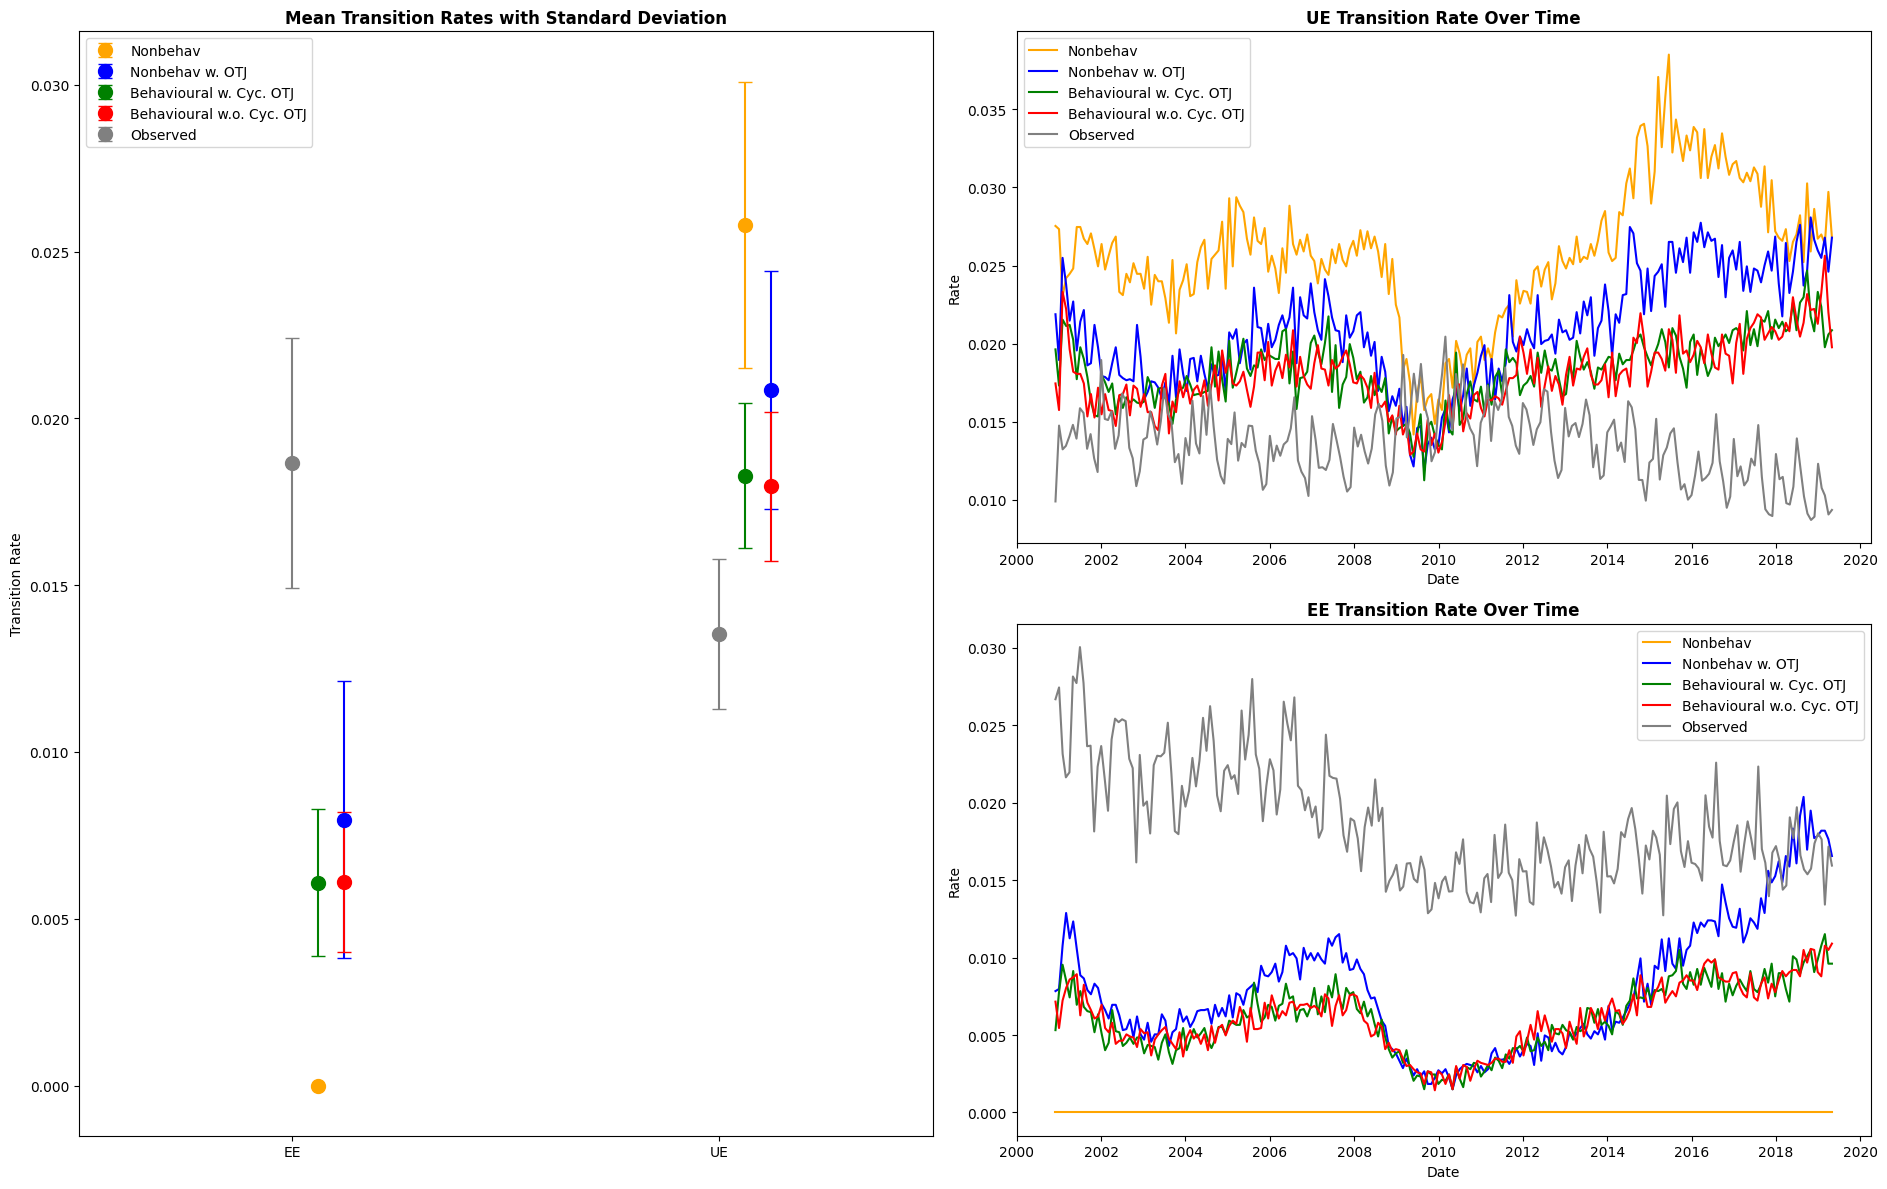

/Users/ebbamark/Documents/Documents - Nuff-Malham/GitHub/transition_abm/calibration_remote/plot_funs.py:225: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  annual_data = res.set_index('DATE').resample(freq).mean()


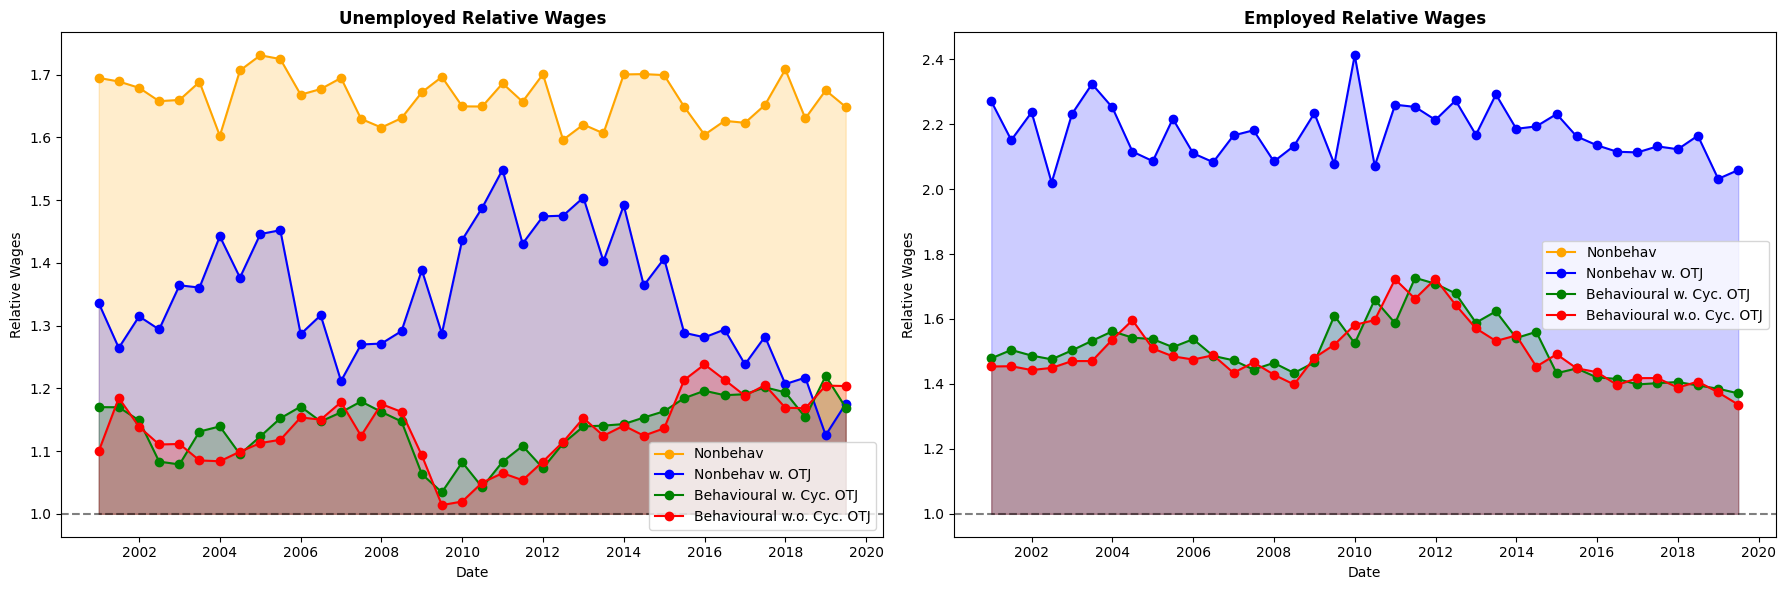

In [9]:
# moved to macro-vars folder from  data/behav_params/Eeckhout_Replication/cps_data/transition_rates_96_24.csv' - created in grouped_transition_rates.R script
all_rates_new = pd.read_csv('data/transition_rates_96_24.csv')
all_rates_new = all_rates_new[(all_rates_new['date'] >= calib_date[0]) & (all_rates_new['date'] <= calib_date[1])]
all_rates_new['DATE'] = pd.to_datetime(all_rates_new['date'])


plot_trans_rates(filtered_model_results, observation = all_rates_new, names = ["Nonbehav", "Nonbehav w. OTJ", "Behavioural w. Cyc. OTJ","Behavioural w.o. Cyc. OTJ"], save = save_button, path = output_path)
plot_rel_wages(filtered_model_results, names = ["Nonbehav", "Nonbehav w. OTJ", "Behavioural w. Cyc. OTJ","Behavioural w.o. Cyc. OTJ"], save = save_button, path = output_path, freq = '6M')

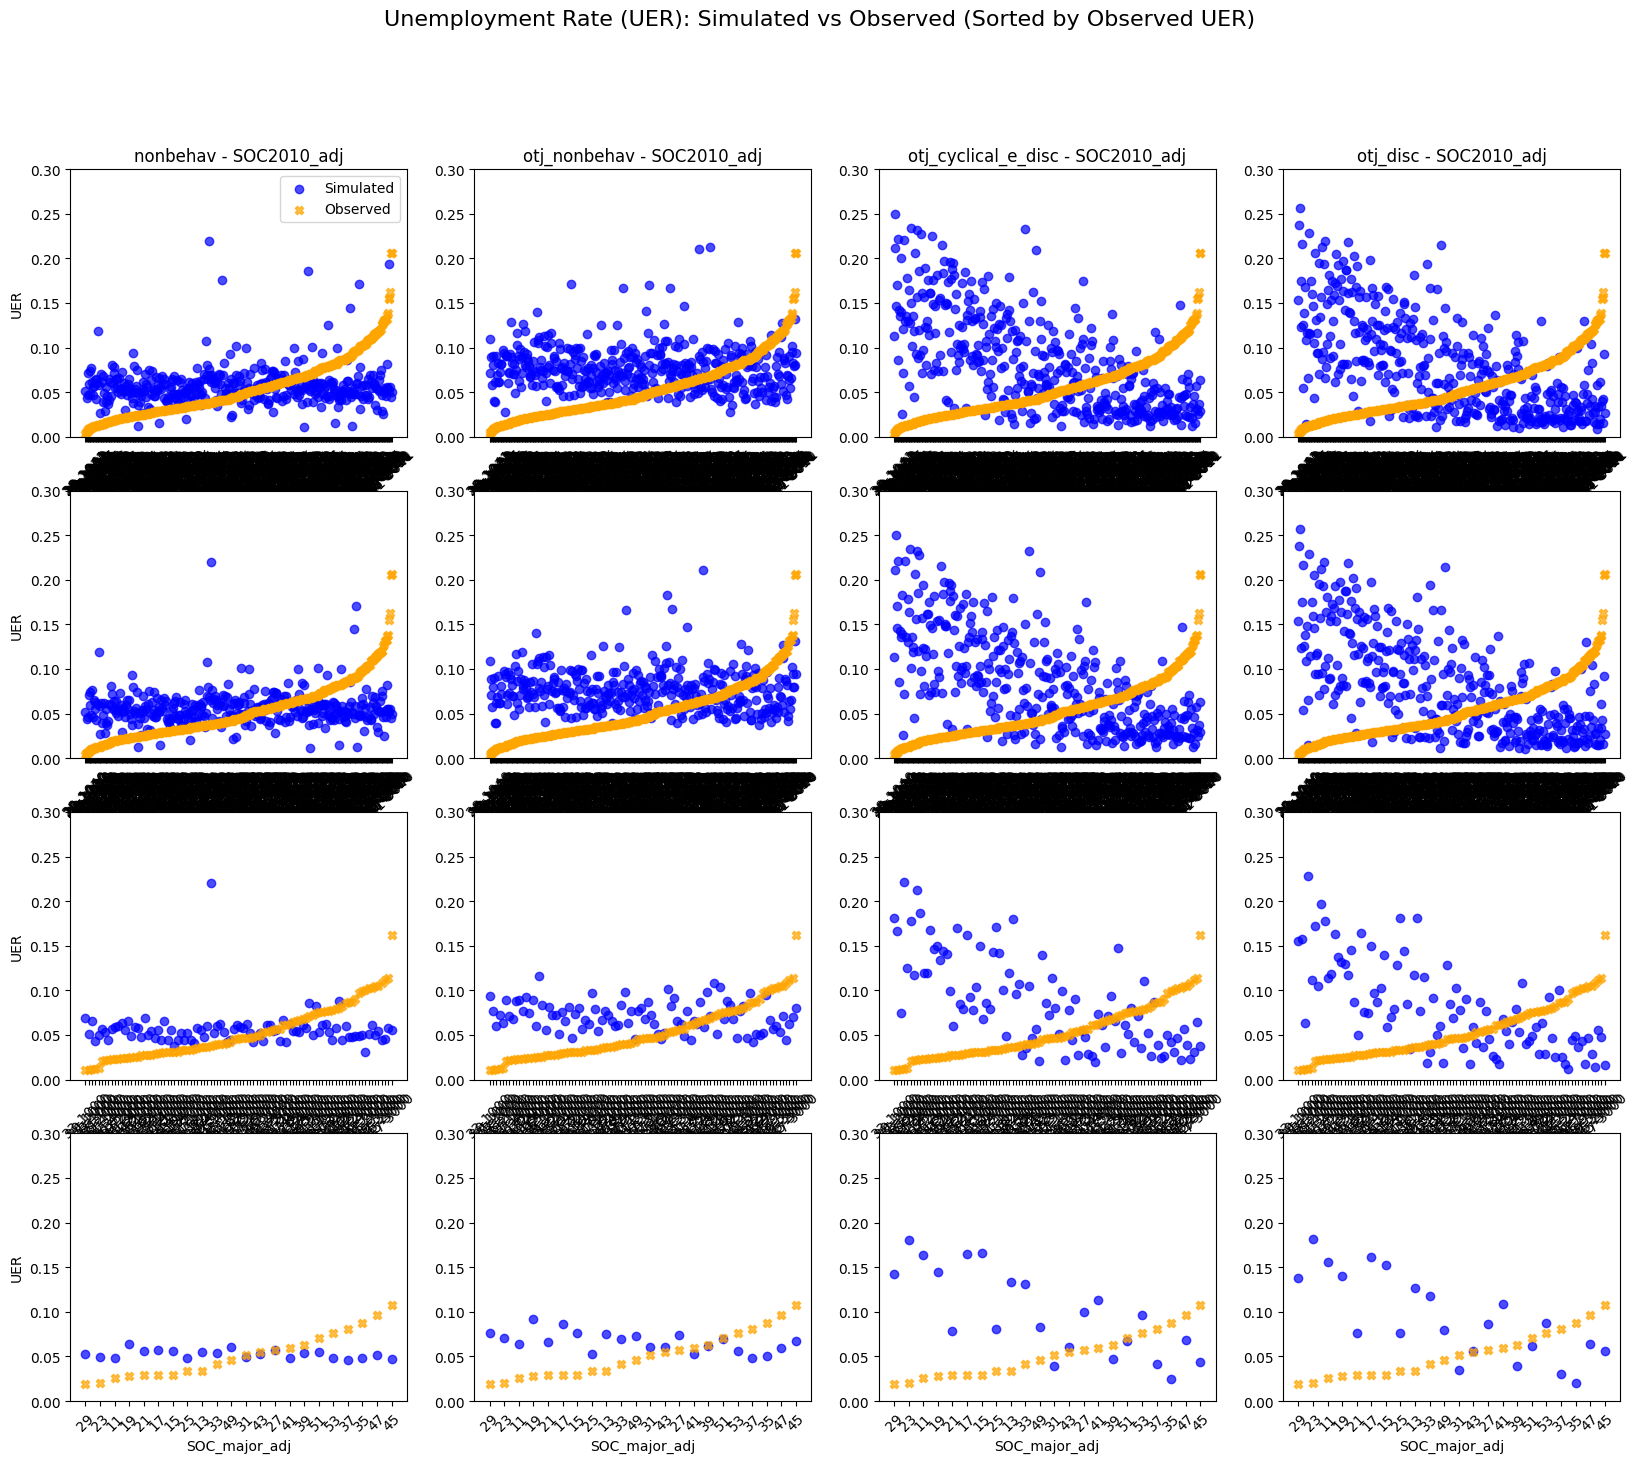

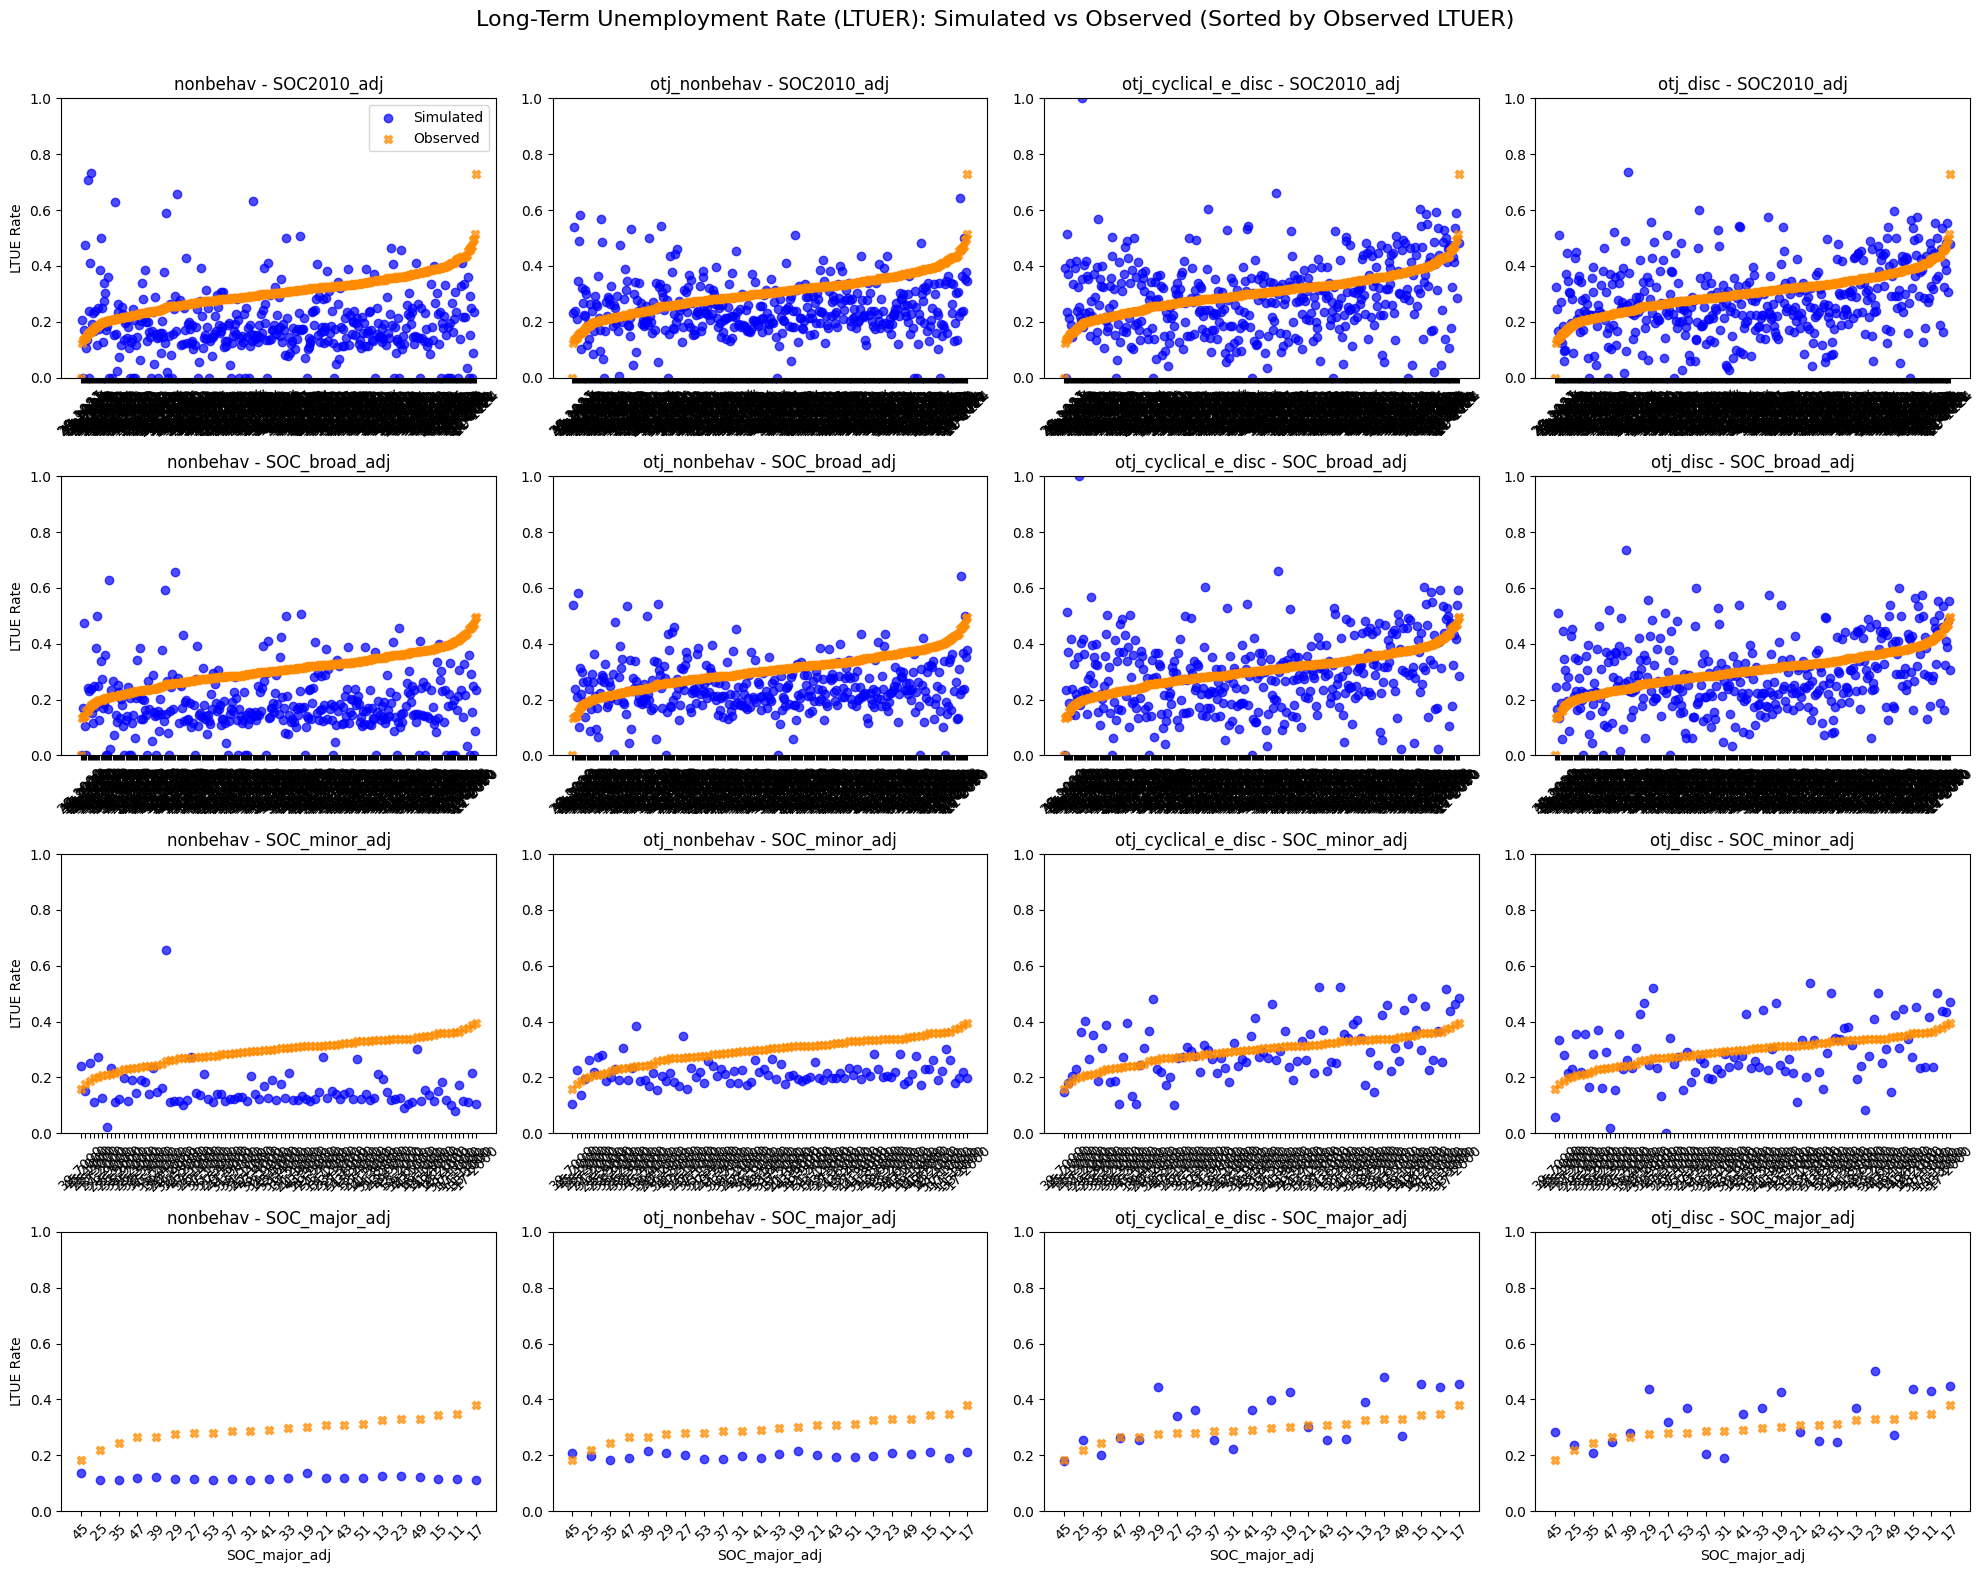

In [24]:
# Example usage:
# occ_ltuers = pd.read_csv(path+"data/highlev_occ_ltuers.csv")
# occ_ltuers = occ_ltuers.groupby('occupation')['ltuer'].mean().reset_index()
# Pasted from data/occ_macro_vars/CPS_LTUER/occ_ltuer_observed.csv
occ_ltuer_obs = pd.read_csv(path + "data/occ_uer_ltuer_observed.csv",
    dtype={
            'SOC_major_adj': str,
            'SOC_minor_adj': str,
            'SOC_broad_adj': str,
            'SOC2010_adj': str,
        }
    )

import plot_funs
importlib.reload(plot_funs)
from plot_funs import *

plot_occupation_uer_grid(filtered_sim_results,occ_ltuer_obs, save=True, path=output_path)
#plot_ltuer_difference_heatmap(filtered_sim_results, occ_ltuer_obs, difference_type = 'absolute', save=False, path=None)


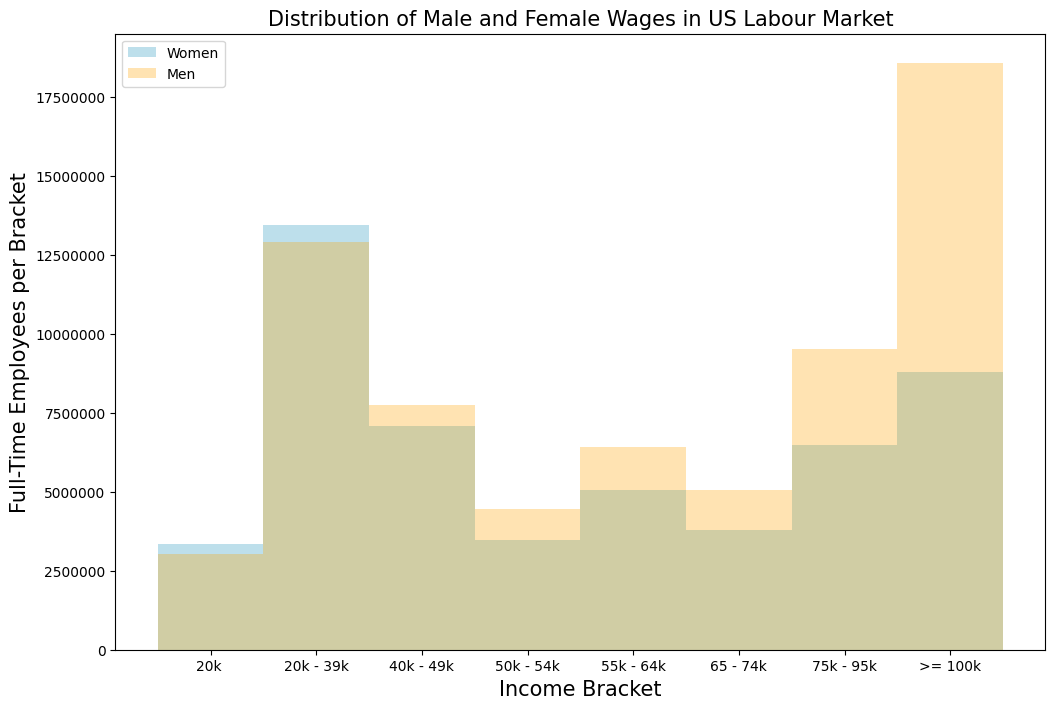

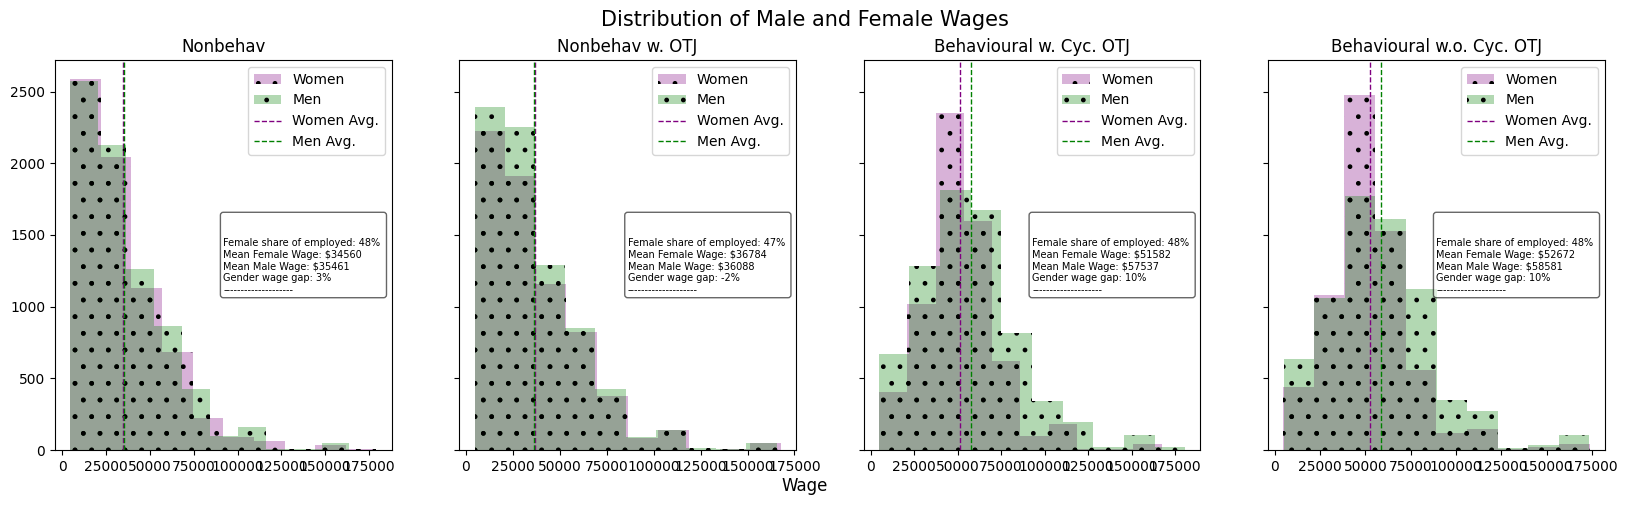

In [11]:

gender_income = pd.read_csv(path+"data/gender_income_distribution_usa_2022.csv", delimiter=',', thousands = ",")

gender_income['Income Bracket'] = gender_income['Income Bracket'].str.replace(' or loss', '')
gender_income['Income Bracket'] = gender_income['Income Bracket'].str.replace(' or more', '')
gender_income['Ceiling'] = gender_income['Income Bracket'].str[-7:]
gender_income['Ceiling'] = gender_income['Ceiling'].str.replace(',', '')
gender_income['Ceiling'] = gender_income['Ceiling'].str.replace('$', '')
gender_income['Ceiling'] = gender_income['Ceiling'].str.replace(' ', '')
gender_income['Ceiling'] = gender_income['Ceiling'].astype('Int64')
gender_income.loc[0:7, 'Bracket'] = "20k "
gender_income.loc[8:12, 'Bracket'] = "20k - 39k"
gender_income.loc[13:14, 'Bracket'] = "40k - 49k"
gender_income.loc[15, 'Bracket'] = "50k - 54k"
gender_income.loc[16, 'Bracket'] = "55k - 64k"
gender_income.loc[17, 'Bracket'] = "65 - 74k"
gender_income.loc[18, 'Bracket'] = "75k - 95k"
gender_income.loc[19, 'Bracket'] = ">= 100k"
brackets = gender_income.groupby(['Bracket']).sum().reset_index()

barWidth = 1
fig = plt.subplots(figsize =(12, 8)) 
br1 = np.arange(len(brackets['Bracket'])) + 1
br2 = br1
 
# Make the plot
plt.bar(br1, brackets['Full-Time Females'], color ='lightblue', width = barWidth, alpha = 0.8,
         label ='Women') 
plt.bar(br2, brackets['Full-Time Males'], color ='orange', width = barWidth, alpha = 0.3,
        label ='Men') 


# Adding Xticks 
plt.xlabel('Income Bracket', fontsize = 15) 
plt.ylabel('Full-Time Employees per Bracket', fontsize = 15) 
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks([r + barWidth for r in range(len(brackets['Bracket']))], 
        brackets['Bracket'])

plt.title('Distribution of Male and Female Wages in US Labour Market', fontsize = 15) 
plt.legend()
plt.show() 

womens_wage = (gender_income['Ceiling'] * gender_income['Full-Time Females']).sum()/(gender_income['Full-Time Females'].sum())
mens_wage = (gender_income['Ceiling'] * gender_income['Full-Time Males']).sum()/(gender_income['Full-Time Males'].sum())

plot_gender_gaps(filtered_net_results, names = ["Nonbehav", "Nonbehav w. OTJ", "Behavioural w. Cyc. OTJ","Behavioural w.o. Cyc. OTJ"], save = True, path = output_path)


In [12]:
from PIL import Image, ImageDraw, ImageFont

def combine_model_images(image_dir, calib_list, sep_strings, output_path="combined_calibration.png"):
    # Load images into groups
    grouped = {match: [] for match, _ in sep_strings}
    titles = {match: title for match, title in sep_strings}
    unmatched = []

    for model_name in calib_list.keys():
        filename = f'{path}output/calibration_{model_name}_sim_results.png'
        filepath = os.path.join(image_dir, filename)
        if not os.path.exists(filepath):
            continue

        img = Image.open(filepath)
        matched = False
        for match, _ in sep_strings:
            if match in model_name:
                grouped[match].append((model_name, img))
                matched = True
                break
        if not matched:
            unmatched.append((model_name, img))

    if unmatched:
        grouped["__unmatched__"] = unmatched
        titles["__unmatched__"] = "Other Models"

    # === Font and Layout Configuration ===
    title_font_size = 80
    name_font_size = 60

    title_height = title_font_size + 20
    name_height = name_font_size + 10
    spacing = 20

    try:
        font = ImageFont.truetype("arial.ttf", name_font_size)
        title_font = ImageFont.truetype("arial.ttf", title_font_size)
    except:
        font = ImageFont.load_default()
        title_font = font

    # Safely get size of the first available image
    first_img = None
    for models in grouped.values():
        if models:
            first_img = models[0][1]
            break

    if first_img is None:
        raise ValueError("No images found in any group.")

    img_width, img_height = first_img.size

    # === Canvas Size Calculation ===
    num_cols = len(grouped)
    max_rows = max(len(models) for models in grouped.values())

    total_width = num_cols * (img_width + spacing)
    total_height = max_rows * (img_height + name_height + spacing) + title_height

    combined_img = Image.new("RGB", (total_width, total_height), color="white")
    draw = ImageDraw.Draw(combined_img)

    # === Drawing images and text ===
    for col, (match, models) in enumerate(grouped.items()):
        x_offset = col * (img_width + spacing)

        # Column title
        title_text = titles[match]
        text_width = draw.textlength(title_text, font=title_font)
        draw.text((x_offset + (img_width - text_width) // 2, 5), title_text, fill="black", font=title_font)

        for row, (name, img) in enumerate(models):
            y_offset = title_height + row * (img_height + name_height + spacing)

            # Model name
            name_text_width = draw.textlength(name, font=font)
            draw.text((x_offset + (img_width - name_text_width) // 2, y_offset), name, fill="black", font=font)

            # Paste image
            combined_img.paste(img, (x_offset, y_offset + name_height))

    # === Save the result ===
    combined_img.save(output_path)
    print(f"Combined image saved to {output_path}")

combine_model_images(
    image_dir=f'{path}output/',
    calib_list=calib_list,
    sep_strings=[
        ("nonbehav", "Non-behavioural w. and w.o OTJ"),
        ("ue", "Cyclical UE SE")
    ],
    output_path="all_calibrations_combined_today.png"
)

ValueError: No images found in any group.